# Section 1


## Question 1: Simulating a dice [5 points]




In this question, you will be using the Python library [Numpy](https://numpy.org/doc/stable/user/absolute_beginners.html) to simulate rolling dice. You will also be using the [seaborn](https://seaborn.pydata.org/) library to build some plots!

In [72]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1.1 Represent a dice [1 point]

You first need to define how many sides your dice will have. You can represent a dice by using a NumPy array and assign to each side a label which will be equal to the number of that side:

In [73]:
# Define the desired number of sides
n_sides = 6

# Create a numpy array with the values from 1-n_sides (both includsive)
dice = np.arange(1, n_sides +1)
dice

array([1, 2, 3, 4, 5, 6])

### 1.2 Rolling the dice [1 point]
Let's roll the dice. You can assume that the dice is fair, which means the probability of landing on each side is the same (it follows a uniform distribution). You can use the function [np.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html), which given a NumPy array returns one of the entries in it randomnly:

#### Discrete Uniform Distribution
The discrete uniform distribution is a probability distribution where a finite number of discrete outcomes are equally likely to occur. This means that each outcome has the same probability, and the probability of any given outcome is the reciprocal of the total number of possible outcomes.

The mean (or expected value) $E[X]$ of a discrete uniform distribution is the average of the smallest and largest possible outcomes:

$$E(X) = \frac{a+b}{2}$$

The variance $Var(X)$ measures the spread of the distribution and is given by:

$$Var(X) = \frac{(b+a-1)^2-1}{12}$$

So, for our case here with a fair die, the mean is 3.5 and the variance is 2.916.

In [74]:
# Roll the dice 20 times
n_rolls = 20

# Roll the dice n_rolls times
rolls = np.random.choice(dice, size=n_rolls)


rolls

array([3, 5, 5, 1, 4, 6, 6, 2, 6, 4, 4, 3, 6, 1, 1, 1, 2, 6, 3, 6])

### 1.3 Mean and Variance of the rolls [2 points]

What if you would like to know the mean and variance of this process. For this you can use NumPy's functions [np.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and [np.var](https://numpy.org/doc/stable/reference/generated/numpy.var.html):

In [75]:
# Compute mean of rolls
m = np.mean(rolls)


# Compute variance of 20 rolls
v = np.var(rolls)

print(f"mean of rolls: {m:.2f}\nvariance of rolls: {v:.2f}")

mean of rolls: 3.75
variance of rolls: 3.59


You can  check the distribution of the rolls by plotting a histogram of the NumPy array that holds the result of each throw. For this we will use the plotting library Seaborn, concretely the [sns.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) function:

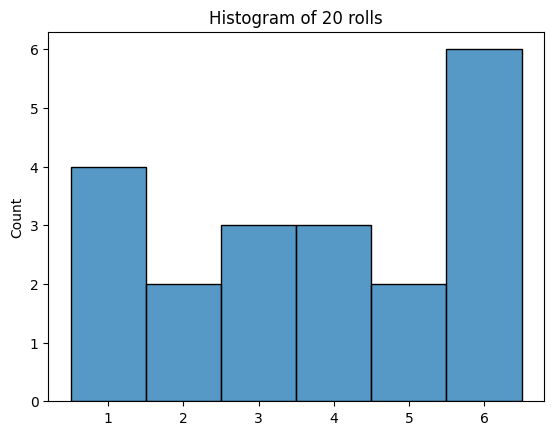

In [76]:
# Display histogram of 20 rolls
n_rolls_hist = sns.histplot(rolls, discrete=True)
n_rolls_hist.set(title=f"Histogram of {n_rolls} rolls")
plt.show()

### 1.4 Law of Large Numbers [1 point]

All of this looks very different from the theoretical values we calculated before. Let's see if we use the law of large numbers, can we get closer to the theoretical mean?

In [77]:
n_rolls = 200000

rolls = np.random.choice(dice, size=n_rolls)

print(f"mean of rolls: {np.mean(rolls):.2f}\nvariance of rolls: {np.var(rolls):.2f}")

mean of rolls: 3.50
variance of rolls: 2.92


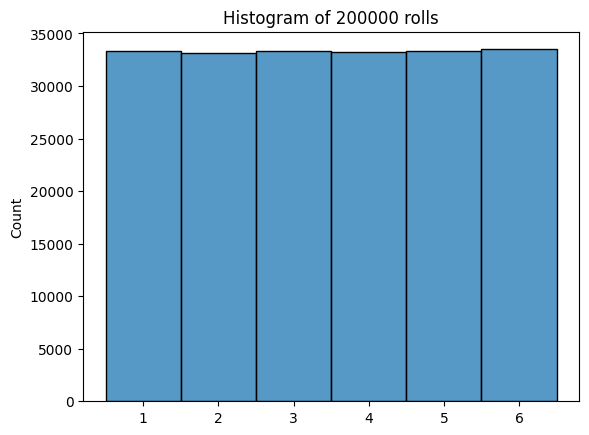

In [78]:
# lets plot this
n_rolls_hist = sns.histplot(rolls, discrete=True)
n_rolls_hist.set(title=f"Histogram of {n_rolls} rolls")
plt.show()

Now this looks a lot closer to the theoretical values!

## Question 2: Central Limit Theorem [5 points]

In this question, you will see the Central Limit Theorem in action.

Recall from class, the CLT states that distribution of sample mean is nearly normal, centered at the population mean, and with a standard deviation equal to the population standard deviation divided by square root of the sample size.

$$\bar{X} \sim N(\mu, \frac{\sigma}{\sqrt{n}})$$

Let us take a population that is not normally distributed. Here we will work with the [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution), and show that if we take a sample from the beta distribution, and take its mean, the mean follows a normal distribution.

Let us first learn the important facts about the beta distribution.

PDF: The beta distribution has two parameters, $\alpha>0$ and $\beta>0$


$$\frac{x^{\alpha-1}(1-x)^{b-1}}{B(\alpha, \beta)}$$


Here:

$$B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}$$

Where $\Gamma$ is the [Gamma function](https://en.wikipedia.org/wiki/Gamma_function)


The mean and variance are given by:

$$E(X) = \frac{\alpha}{\alpha+\beta}$$

$$Var(X) = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$$

You will generate the data for this Beta population by using the [np.random.beta](https://numpy.org/doc/stable/reference/random/generated/numpy.random.beta.html)

### 2.1 Generate a population that follows the beta distribution [1 point]

In [79]:
alpha = 0.5
beta = 0.5
size_of_population = 100000

# lets create a ppopulation of size size_of_population using np.random.beta
beta_population = np.random.beta(alpha, beta, size=size_of_population)

### 2.2 Mean and Variance of the population [1.5 points]
What is the mean and variance of this population? Calculate the values theoretically. [1 point]


$\text{Theoretical Mean:} \quad \mu = \frac{\alpha}{\alpha + \beta} = \frac{0.5}{0.5 + 0.5} = 0.5$

$\text{Theoretical Variance:}$ $\quad \sigma^2 = \frac{\alpha \cdot \beta}{(\alpha + \beta)^2 \cdot (\alpha + \beta + 1)} = \frac{0.5 \cdot 0.5}{(0.5 + 0.5)^2 \cdot (0.5 + 0.5 + 1)} = \frac{0.25}{1^2 \cdot 2} = \frac{0.25}{2} = 0.125$


Now, compute the values using code below, from the population you defined above [0.5 point]

In [80]:
# Write code to calculate mean and variance
mean_beta = np.mean(beta_population)
var_beta = np.var(beta_population)
print(f"mean of beta: {mean_beta:.2f}\nvariance of beta: {var_beta:.3f}")

mean of beta: 0.50
variance of beta: 0.125


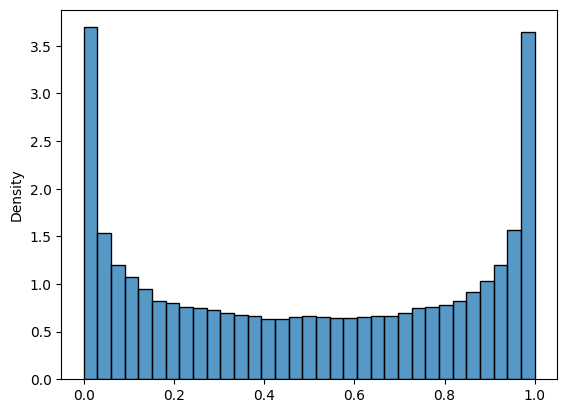

In [81]:
# Lets plot this. This does not look normal (and it shouldn't)

sns.histplot(beta_population, stat="density")
plt.show()

### 2.3 Sampling from the population [1.5 points]

In the real world, you will never have access to the entire population, or know its mean and variance. To make inference in the real world, we need to draw samples from the population.

The size of the sample, and way you draw the sample determines how close you get to the truth about the population. In this exercise, we will sample from our beta population.

To test whether the CLT holds, we can draw many many samples from the population, find out all their means, and calculate their mean, and standard deviation. In real life, you will not be able to this, you will only be able to draw one sample. However, this exercise should show you that the CLT holds, and you can use it to make inferences about the one sample you drew

Now lets define a function, `sample_means`. In this function,
you take random samples out of the population (the sampling is done with replacement, which means that once you select an element you put it back in the sampling space so you could choose a particular element more than once). This ensures that the independence condition is met.

Compute the mean of each sample

Save the means of each sample in a numpy array

In [82]:
def sample_means(data: np.array, sample_size: int) -> np.array:
  """Generates 100000 samples, takes their mean, and returns the means
  functions
  Args:
    data: np.array containing the entire population
    sample_size: int describing how large a sample to take from the population
  Returns:
    Means of the 100000 samples taken from the population
  """
  # Save all the means in a list
  means = []
  # You are drawing 100000 samples here
  for _ in range(100000):
    # Get a sample of the data WITH replacement
    sample = np.random.choice(data, size=sample_size, replace=True)
    # Save the mean of the sample by appending to means
    means.append(np.mean(sample))
    # Return the means within a numpy array
  return np.array(means)

Now you are ready to draw multiple samples from your beta population, calculate their means, and plot them! We should expect that plot to look like a normal distribtuion!

### 2.4 Calculate the mean and variance for the sample means [0.5 points]

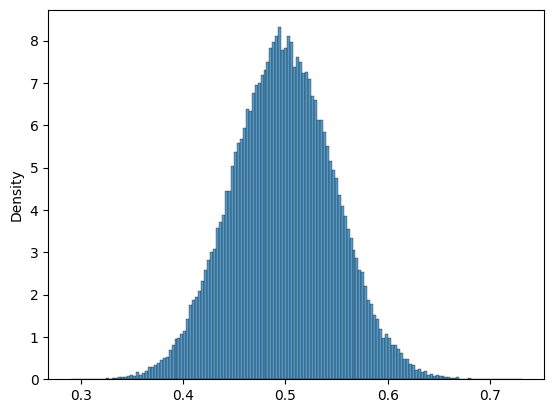

In [83]:
# Compute the sample means
gaussian_sample_means = sample_means(beta_population, sample_size=50)

# Plot a histogram of the sample means
sns.histplot(gaussian_sample_means, stat="density")
plt.show()

Whoa! That looks like a normal distribution! Now, we need to verify what the mean and standard deviation would be. Recall, from CLT:

$$\bar{X} \sim N(\mu, \frac{\sigma}{\sqrt{n}})$$

In the previous exercise, you calculated the mean and variance of the beta population. Now lets calculate the mean and variance of the means above, and compare it to the theoretical values

In [84]:
mean_of_means = np.mean(gaussian_sample_means)
var_of_means =  np.var(gaussian_sample_means)
print(f"Mean of means: {mean_of_means:.2f}\nvariance of means: {var_of_means:.5f}")

Mean of means: 0.50
variance of means: 0.00250


### 2.5 Variance of the population [0.5 points]

Can you derive the variance of the population from the variance of the means you calculated above? Show your work.


$\text{Variance of the sample means} = \frac{\text{Variance of the population}}{n}$
$\quad \Rightarrow \quad \text{Variance of the population} = \text{Variance of the sample means} \times n$

$\text{Variance of the population} = 0.00250 \times 50 = 0.125$

## Question 3 Dot Product of vectors [5 points]

### 3.1 - Definition of the Dot Product [2 points]

The **dot product** (or **scalar product**) is an algebraic operation that takes two vectors $x=\begin{bmatrix}
          x_1 & x_2 & \ldots & x_n
\end{bmatrix}^T\in\mathbb{R}^n$ and  
$y=\begin{bmatrix}
          y_1 & y_2 & \ldots & y_n
\end{bmatrix}^T\in\mathbb{R}^n$ and returns a single scalar. The dot product can be represented with a dot operator $x\cdot y$ and defined as:

$$x\cdot y = \sum_{i=1}^{n} x_iy_i = x_1y_1+x_2y_2+\ldots+x_ny_n$$

In [85]:
def dot(x:np.array, y:np.array) -> np.array:
  """Returns dot product of two vectors without using the inbuilt numpy
  functions
  Args:
    x: np.array
    y: np.array
  Returns:
    Dot product of x and y
  """
  product = 0
  for xi, yi in zip(x, y):
    product += xi * yi
  return product

####Speed of Calculations in Vectorized Form

Dot product operations in Machine Learning applications are applied to the large vectors with hundreds or thousands of coordinates (called **high dimensional vectors**).

It is important to understand the difference in the speed of calculations using vectorized and the loop forms of the vectors and functions. In the loop form operations are performed one by one, while in the vectorized form they can be performed in parallel. You can use the function np.dot, or the @ symbol to perform vectorized dot products.


Let's perform a simple experiment to compare their speed. Define new vectors $a$ and $b$ of the same size $1,000,000$:

In [86]:
a = np.random.rand(1000000)
b = np.random.rand(1000000)

In [87]:
import time

tic = time.time()
c = dot(a,b)
toc = time.time()
print("Dot product: ", c)
print ("Time for the loop version:" + str(1000*(toc-tic)) + " ms")

Dot product:  249927.3152145403
Time for the loop version:288.3899211883545 ms


In [88]:
tic = time.time()
c = np.dot(a,b)
toc = time.time()
print("Dot product: ", c)
print ("Time for the vectorized version, np.dot() function: " + str(1000*(toc-tic)) + " ms")

Dot product:  249927.31521455123
Time for the vectorized version, np.dot() function: 2.255678176879883 ms


In [89]:
tic = time.time()
c = a @ b
toc = time.time()
print("Dot product: ", c)
print ("Time for the vectorized version, @ function: " + str(1000*(toc-tic)) + " ms")

Dot product:  249927.31521455123
Time for the vectorized version, @ function: 1.5647411346435547 ms


You can see that vectorization is extremely beneficial in terms of the speed of calculations!

### 3.2 Angle between vectors [3 points]

In [Euclidean space](https://en.wikipedia.org/wiki/Euclidean_space), a Euclidean vector has both magnitude and direction. The dot product of two vectors $x$ and $y$ is defined by:

$$x\cdot y = \lvert x\rvert \lvert y\rvert \cos(\theta)$$

where $\theta$ is the angle between the two vectors:


This provides an easy way to test the orthogonality between vectors. If $x$ and $y$ are orthogonal (the angle between vectors is $90^{\circ}$), then since $\cos(90^{\circ})=0$, it implies that **the dot product of any two orthogonal vectors must be $0$**. Let's test it, taking two vectors $i$ and $j$ we know are orthogonal:

In [90]:
i = np.array([1, 0, 0])
j = np.array([0, 1, 0])
print("The dot product of i and j is", dot(i, j))

The dot product of i and j is 0


Geometric definition of a dot product is used in one of the applications - to evaluate **vector similarity**. In Natural Language Processing (NLP) words or phrases from vocabulary are mapped to a corresponding vector of real numbers. Similarity between two vectors can be defined as a cosine of the angle between them. When they point in the same direction, their similarity is 1 and it decreases with the increase of the angle.

Then equation $(2)$ can be rearranged to evaluate cosine of the angle between vectors:

$\cos(\theta)=\frac{x \cdot y}{\lvert x\rvert \lvert y\rvert}$

Zero value corresponds to the zero similarity between vectors (and words corresponding to those vectors). Largest value is when vectors point in the same direction, lowest value is when vectors point in the opposite directions.

We will do one such application in the next exercise. For now, let us code up a function that takes in two vectors, and returns the $cos(\theta)$ between them.

In [91]:
def cosine_similarity_manual(x: np.array, y:np.array) -> float:
  """Returns the cosine of the angle between the vectors x and y
  Do not use the inbuilt cosine_similarity function
  Args:
    x: np.array of float values
    y: np.array of float values
  Returns:
      A float between -1 and 1 representing the cosine of angle between x and y
  """
  dot_product = dot(x, y)
  norm_x = np.linalg.norm(x)
  norm_y = np.linalg.norm(y)
  cosine_similarity = dot_product / (norm_x * norm_y)
  return cosine_similarity

In [92]:
# lets test it out
i = np.array([1, 2, 0])
j = np.array([1, -1, -1])


cosine_similarity_manual(i, j)

-0.2581988897471611

## Question 4: Natural Language Processing [10 points]

In NLP, cosine similarity is often used to compare text documents by representing them as high-dimensional vectors, where each dimension corresponds to a word's frequency in the document. This is called TF-IDF (Term Frequency-Inverse Document Frequency).

In this exercise, we will go through several steps to implement a crude version of measuring cosine similarity between two pieces of text, that will tell us how similar the two pieces of text are.

However, to be able to use cosine similarity in a meaningful manner, we first need to convert the two pieces of text into vector representation. This involves several steps:



Steps:

1. Tokenization: Break the sentences into individual words (tokens).
2. Term Frequency (TF): Calculate the term frequency for each word in the document.
3. Inverse Document Frequency (IDF): Calculate the inverse document frequency to downweight common words.
4. TF-IDF Calculation: Multiply the term frequency by the inverse document frequency to get the TF-IDF values.
5. Cosine Similarity: Manually calculate the cosine similarity between the resulting vectors.

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic used in text mining and information retrieval to evaluate the importance of a word in a document relative to a collection of documents (known as a corpus). It combines two statistics, Term Frequency (TF) and Inverse Document Frequency (IDF), to weigh words in such a way that frequent words in a document are emphasized while common words across many documents (like "the" or "is") are downweighted.

**Term Frequency (TF):**

The term frequency of a word in a document measures how frequently the word appears in that document. The more often a word appears in a document, the higher its TF value. It is calculated as:

$$TF(t, d) = \frac{\text{Number of times term t appears in document d
}}{\text{Total number of terms in document d
}}$$

**Inverse Document Frequency (IDF):**

The inverse document frequency measures how important a term is across the entire corpus. It downweights terms that appear in many documents because such terms are less discriminative. IDF is calculated as:

$$IDF(t)=log\left(\frac{N}{1+DF(t)}\right) + 1$$.

where

$N$ = total number of documents in the corpus.

$DF(t)$ = number of documents that contain term $t$

**TF-IDF Calculation:**

$$TF-IDF(t,d)=TF(t,d)×IDF(t) $$

**Cosine Similarity**

The closer the cosine value is to 1, the smaller the angle, and the more similar the vectors (and therefore, the documents) are.

In [93]:
import numpy as np
import math

In [94]:
# Step 1: Define the text documents
# feel free to play around with different sentences here
doc1 = "Predictive Analytics is fascinating. I love predictive analytics."
doc2 = "Artificial intelligence is fascinating. I love AI"

### 4.1 Tokenize the input [2 points]

This is an important part of the process. We are doing minimum processing here. In the real world, you would also want to remove things like stop words from the documents

In [95]:
# Step 2: Tokenize the documents [2 points]
def tokenize(doc: str) -> list:
  """Cleans the document to prepare it for analysis. This involves:
  1. converting every word to lowercase
  2. removing punctuation like ,.;:?
  Args:
    doc: A document in string format
  Returns:
      A list containing each word in the document in lower case
  """
  punctuation = ",.;:?"

  doc = doc.lower()
  for char in punctuation:
    doc = doc.replace(char, "")
  return doc.split()

In [96]:
tokens_doc1 = tokenize(doc1)
tokens_doc2 = tokenize(doc2)

In [97]:
tokens_doc1

['predictive',
 'analytics',
 'is',
 'fascinating',
 'i',
 'love',
 'predictive',
 'analytics']

In [98]:
tokens_doc2

['artificial', 'intelligence', 'is', 'fascinating', 'i', 'love', 'ai']

### 4.2 Calculate the frequency of each word [2 points]

In [99]:
# Step 2: Calculate the frequency of each word
def word_frequency(tokens: list) -> dict:
  """Returns the frequency of each word in a list of tokens.
  Args:
    tokens: A list of words
  Returns:
      A dictionary containing each word in the list of tokens and its frequency
  """

  count_of_word = {}
  # use a hashmap/dictionary to calculate the frequency of each token
  for word in tokens:
    if word in count_of_word:
      count_of_word[word] += 1
    else:
      count_of_word[word] = 1
  return count_of_word

In [100]:
word_frequency1 = word_frequency(tokens_doc1)
word_frequency2 = word_frequency(tokens_doc2)

In [101]:
word_frequency1

{'predictive': 2, 'analytics': 2, 'is': 1, 'fascinating': 1, 'i': 1, 'love': 1}

In [102]:
word_frequency2

{'artificial': 1,
 'intelligence': 1,
 'is': 1,
 'fascinating': 1,
 'i': 1,
 'love': 1,
 'ai': 1}

### 4.3 Define your entire vocabulary

In [103]:
# Step 3: Create a combined set of unique words (vocabulary)
# This is your entire dictionary.
vocabulary = set(tokens_doc1).union(set(tokens_doc2))
vocabulary = list(vocabulary)  # Convert to a list for indexing

### 4.4 Calculate the TF part of TF-IDF [2 points]

In [104]:
# Step 4: Calculate Term Frequency (TF)
def term_frequency(tokens: list, count_of_word: dict) -> dict:
  """Returns the Term Frequency for each word in tokens
  Args:
    tokens: A list of words
  Returns:
      A dict containing the Term Frequency for each word in tokens
  """
  tf = {}
  total_words = len(tokens)

  for word in count_of_word:
    tf[word] = count_of_word[word] / total_words

  return tf

In [105]:
tf_doc1 = term_frequency(tokens_doc1, word_frequency1)
tf_doc2 = term_frequency(tokens_doc2, word_frequency2)

In [106]:
tf_doc1

{'predictive': 0.25,
 'analytics': 0.25,
 'is': 0.125,
 'fascinating': 0.125,
 'i': 0.125,
 'love': 0.125}

In [107]:
tf_doc2

{'artificial': 0.14285714285714285,
 'intelligence': 0.14285714285714285,
 'is': 0.14285714285714285,
 'fascinating': 0.14285714285714285,
 'i': 0.14285714285714285,
 'love': 0.14285714285714285,
 'ai': 0.14285714285714285}

### 4.5 Calculate the IDF part of TF-IDF [2 points]

In [108]:
# Step 5: Calculate Inverse Document Frequency (IDF)
def inverse_document_frequency(documents: list, vocabulary: list) -> dict:
  """Returns the IDF Frequency for each word in vocabulary
  Args:
    vocabulary: All words in the vocab
  Returns:
      A dict containing the IDF for each word in vocabulary
  """
  idf = {}
  N = len(documents)

  for word in vocabulary:
    df = sum(1 for doc in documents if word in doc)

    idf[word] = math.log((N / (1 + df))) + 1
  return idf

In [109]:
documents = [tokens_doc1, tokens_doc2]
idf = inverse_document_frequency(documents, vocabulary)

In [110]:
idf

{'i': 0.5945348918918356,
 'artificial': 1.0,
 'analytics': 1.0,
 'intelligence': 1.0,
 'is': 0.5945348918918356,
 'fascinating': 0.5945348918918356,
 'predictive': 1.0,
 'ai': 1.0,
 'love': 0.5945348918918356}

### 4.6 Calculate TF-IDF for each word in each document [2 points]

In [116]:
# Step 6: Calculate TF-IDF for each document
def tfidf(tf, idf):
  """Returns the TF-IDF Frequency for each word in IDF
  Args:
    tf: A dictionary containing the TF for words in a document
    idf: A dictionary containing the IDF for each word in voabulary
  Returns:
      A dict containing the TF-IDF for each word in vocabulary. Note that
      if a word appears in IDF, but not in TF, its TF-IDF value should be 0
  """
  tfidf = {}
  vocabulary = set(tokens_doc1).union(set(tokens_doc2))

  for word in vocabulary:
    tf_value = tf.get(word, 0)
    idf_value = idf.get(word, 0)
    tfidf[word] = tf_value * idf_value

  return tfidf

In [117]:
tfidf_doc1 = tfidf(tf_doc1, idf)
tfidf_doc2 = tfidf(tf_doc2, idf)

In [118]:
tfidf_doc1

{'i': 0.07431686148647945,
 'artificial': 0.0,
 'analytics': 0.25,
 'intelligence': 0.0,
 'is': 0.07431686148647945,
 'fascinating': 0.07431686148647945,
 'predictive': 0.25,
 'ai': 0.0,
 'love': 0.07431686148647945}

In [119]:
tfidf_doc2

{'i': 0.08493355598454794,
 'artificial': 0.14285714285714285,
 'analytics': 0.0,
 'intelligence': 0.14285714285714285,
 'is': 0.08493355598454794,
 'fascinating': 0.08493355598454794,
 'predictive': 0.0,
 'ai': 0.14285714285714285,
 'love': 0.08493355598454794}

### 4.7 Calculate cosine similarity between the two document vectors

In [120]:
# Lets first create two vectors from the dictionaries tfidf_doc1 and tfidf_doc2
wordlist1 = []
wordlist2 = []
for word in tfidf_doc1:
  wordlist1.append(tfidf_doc1[word])
  wordlist2.append(tfidf_doc2[word])

In [121]:
# convert to np.array and find cosine_similarity
cosine_similarity_manual(np.array(wordlist1), np.array(wordlist2))

0.21934088631291015

# Section 2

## Question 5 [10 points]

We discussed the MLE method in class to find the parameters of a distribution from a set of data. Assume that you had an iid sample from a distribution that has the following PMF, with parameter p:


$$P(X=x) = (1-\theta)^{x-1}\theta$$

$x = 1,2,3...$

$0<\theta< 1 $

### 5a. Write down the likelihood function (2 points)

$L(\theta) = \theta^n \cdot (1 - \theta)^{\sum_{i=1}^{n} x_i - n}$

### 5b. Find the log likelihood function (2 point)


$\log L(\theta) = n \log \theta + \left( \sum_{i=1}^{n} x_i - n \right) \log (1 - \theta)$

### 5c. Maximize the log likelihood function using calculus and find the MLE of $\theta$ (check the second derivative as well) (6 points)

$$ \log L(\theta) = n \log \theta + \left( \sum_{i=1}^{n} x_i - n \right) \log (1 - \theta)$$

$\text{Taking the derivative of the log-likelihood function: }$

$$\frac{d}{d\theta} \log L(\theta) = \frac{n}{\theta} - \frac{\sum_{i=1}^{n} x_i - n}{1 - \theta}$$

$\text{Setting the derivative equal to zero:}$

$$\frac{n}{\theta} = \frac{\sum_{i=1}^{n} x_i - n}{1 - \theta}$$

$\text{Solving for $\theta$:}$

$$\hat{\theta} = \frac{n}{\sum_{i=1}^{n} x_i}$$

$\text{So, the MLE of $\theta$ is:}$
$$\hat{\theta} = \frac{n}{\sum_{i=1}^{n} x_i}$$



## Question 6 [5 points]

Spam filters work by looking at commonly occurring phrases in spam. 80% of all emails sent out are spam. In 10% of the spam emails, the phrase “get rich” is used, whereas this get is only used in 1% of non-spam emails. A new email has just arrived, which does mention “get rich”. What is the probability that it is spam?


$\text{We can use Bayes' Theorem to solve this problem:}$

$$P(\text{Spam} | \text{get rich}) = \frac{P(\text{get rich} | \text{Spam}) P(\text{Spam})}{P(\text{get rich})}$$

$\text{Where:}$

$$P(\text{get rich}) = P(\text{get rich} | \text{Spam}) P(\text{Spam}) + P(\text{get rich} | \text{Not Spam}) P(\text{Not Spam})$$


$\text{We substitute the given values: }$

$$P(\text{get rich}) = (0.1 \times 0.8) + (0.01 \times 0.2) = 0.08 + 0.002 = 0.082$$


$\text{Now, we can apply Bayes' Theorem:}$

$$P(\text{Spam} | \text{get rich}) = \frac{(0.1 \times 0.8)}{0.082} = \frac{0.08}{0.082} \approx 0.9756$$


$\text{Thus, the probability that the email is spam given that it mentions "get rich" is approximately 0.9756 or 97.56%.}$


## Question 7 [5 points]
Recall that covariance is a measure of how two random variables change together. It quantifies the degree to which one variable tends to increase or decrease when the other variable does the same.

We looked at two different ways of looking at covariance.

$$Cov(X, Y) = E[(X − E(X))(Y − E(Y))] = E[XY] − E[X]E[Y]$$


### 7.1 [2 points]

Starting from $Cov(X, Y) = E[(X − E(X))(Y − E(Y))]$, prove that this is equivalent to $E[XY] − E[X]E[Y]$

$\text{Starting with the definition of covariance:}$

$$\text{Cov}(X, Y) = E[(X - E[X])(Y - E[Y])]$$

$\text{Expanding the terms inside the expectation:}$

$$= E[XY - X E[Y] - Y E[X] + E[X]E[Y]]$$

$\text{Using the linearity of expectation rule, we have:}$

$$= E[XY] - E[X]E[Y] - E[Y]E[X] + E[X]E[Y]$$

$\text{Since $E[X]E[Y]$ is constant, the last two terms cancel:}$

$$= E[XY] - E[X]E[Y]$$

$\text{Thus, we have:}$

$$\text{Cov}(X, Y) = E[XY] - E[X]E[Y]$$


### 7.2 [3 points]

Prove:

$$Cov(X, Y+Z) = Cov(X, Y) + Cov(X, Z)$$

$\text{Starting with the definition of covariance for $\text{Cov}(X, Y + Z)$:}$


$$\text{Cov}(X, Y + Z) = E[(X - E[X])((Y + Z) - E[Y + Z])]$$

$\text{Since $E[Y + Z] = E[Y] + E[Z]$, we rewrite the equation as:}$

$$= E[(X - E[X])((Y - E[Y]) + (Z - E[Z]))]$$

$\text{Distributing the terms:}$

$$= E[(X - E[X])(Y - E[Y])] + E[(X - E[X])(Z - E[Z])]$$

$\text{Thus, we have:}$

$$\text{Cov}(X, Y + Z) = \text{Cov}(X, Y) + \text{Cov}(X, Z)$$




## Question 8 [5 points]

Let $H$ be a binary random variable that can take values in $\{0,1\}$. You can think of $H$ as indicating whether a certain condition is present ($H=1$) or absent ($H=0$).

Let $X_1, X_2, \dots, X_n$ be $n$ random variables (each can take on certain values - binary, categorical, or other types). You can think of these as $n$ different “symptoms” or “features.”

**Assumption (Conditional Independence):**  
We assume that, *given $H$*, the features $X_1, \dots, X_n$ are conditionally independent. Symbolically, for each value $h \in \{0,1\}$, we have:

$$
P\bigl(X_1 = x_1, X_2 = x_2, \dots, X_n = x_n \,|\, H = h\bigr)
= \prod_{i=1}^n P\bigl(X_i = x_i \,|\, H = h\bigr).
$$

(Note: This is the “naive” conditional independence assumption often used in certain classification methods, but we won't dive into the classification algorithm itself.)


### 8.1. Factorizing the Joint Probability [1 point]

1. **Discuss** why the conditional independence might be practically useful when $n$ is large. (Hint: Consider how many parameters or probability values you need to estimate in a general joint distribution of $n$ variables vs. how many you need to estimate if you assume conditional independence.)


### 8.2. Computing the Posterior Probability of $H$ [1 point]

Using Bayes' Theorem, we can write:

$$
P\bigl(H = h \mid X_1 = x_1, \ldots, X_n = x_n \bigr)
= \frac{P\bigl(X_1 = x_1, \ldots, X_n = x_n \mid H = h\bigr)\, P(H = h)}
       {P\bigl(X_1 = x_1, \ldots, X_n = x_n\bigr)}.
$$

**Express** $P(H = h \mid X_1 = x_1, \ldots, X_n = x_n)$ by substituting in:
   - The factorized form for $P\bigl(X_1 = x_1, \ldots, X_n = x_n \mid H = h\bigr)$.
   - The prior $P(H = h)$.
   - The law of total probability for the denominator



### 8.3. Comparing Two Posterior Hypotheses [1 point]

Often, we are interested in comparing whether $H=1$ or $H=0$ is more likely after observing $X_1 = x_1, \ldots, X_n = x_n$. Show that:

$$
\frac{P(H = 1 \mid X_1 = x_1, \ldots, X_n = x_n)}
     {P(H = 0 \mid X_1 = x_1, \ldots, X_n = x_n)}
= \frac{P(H = 1)}{P(H = 0)}
  \times
  \frac{\prod_{i=1}^n P(X_i = x_i \mid H = 1)}
       {\prod_{i=1}^n P(X_i = x_i \mid H = 0)}.
$$


### 8.4. Practicality of Conditional Independence [2 points]

Conditional independence assumption is a naive assumption. Give a real life scenario where the assumption might fail.

Do you think the conditional independence assumption over or underestimates the true probability?


##8.1

When $n$ is large, estimating joint probabilities can become computationally expensive, especially when we have to estimate a large number of parameters. If we assume that the features $X_1, X_2, \dots, X_n$ are conditionally independent given the condition $H$, we can greatly reduce the number of parameters to estimate.

This means that instead of estimating the full joint distribution of $n$ variables, we can simply estimate the individual conditional distributions:

$P(X_1, X_2, \dots, X_n | H = h) = \prod_{i=1}^n P(X_i | H = h)$

Using this assumption of conditional independence therefore makes calculations more manageable when we are dealing with a large number of variables, as the complexity is significantly reduced.



## 8.2

Using Bayes' Theorem, we can express the posterior probability as:


$$P(H = h | X_1 = x_1, \dots, X_n = x_n) = \frac{P(X_1 = x_1, \dots, X_n = x_n | H = h) P(H = h)}{P(X_1 = x_1, \dots, X_n = x_n)}$$

By assuming conditional independence, we have:

$$P(X_1 = x_1, \dots, X_n=x_n | H=h) = \prod_{i=1}^n P(X_i = x_i | H=h)$$

This simplifies the posterior calculation by allowing us to compute the conditional probability for each feature independently, so now we can express the equation as:

$$P(H = h \mid X_1 = x_1, \dots, X_n = x_n) = \frac{P(H = h) \prod_{i=1}^{n} P(X_i = x_i \mid H = h)}{P(X_1 = x_1, \dots, X_n = x_n)}$$

## 8.3

Given that we want to show that:

$$\frac{P(H = 1 | X_1 = x_1, \dots, X_n = x_n)}{P(H = 0 | X_1 = x_1, \dots, X_n = x_n)} = \frac{P(H = 1)}{P(H = 0)} \prod_{i=1}^n \frac{P(X_i = x_i | H = 1)}{P(X_i = x_i | H = 0)}$$

We can use Bayes’ Theorem, to factor the likelihood terms:

$$P(H = h | X_1 = x_1, \dots, X_n = x_n) = \frac{P(X_1 = x_1, \dots, X_n = x_n | H = h) P(H = h)}{P(X_1 = x_1, \dots, X_n = x_n)}$$

This gives us:


$$\frac{P(H = 1 | X_1 = x_1, \dots, X_n = x_n)}{P(H = 0 | X_1 = x_1, \dots, X_n = x_n)} = \frac{P(H = 1)}{P(H = 0)} \prod_{i=1}^n \frac{P(X_i = x_i | H = 1)}{P(X_i = x_i | H = 0)}$$


Since the conditional independence assumption holds, we can factor the likelihood terms:

$$= \frac{P(H = 1)}{P(H = 0)} \prod_{i=1}^n \frac{P(X_i = x_i | H = 1)}{P(X_i = x_i | H = 0)}$$

This means that the ratio of the posteriors is the product of the ratio of the likelihoods for each feature $X_i$, which is weighted by the prior odds between $H=1$ and $H=0$.


## 8.4

A real-life scenario where the conditional independence assumption might fail would be a spam filter trying to classify emails as "spam" or "not spam." In this scenario, features like the presence of specific words (e.g., "sale," "free," "discount," or "get rich" as mentioned earlier) and the sender's address are being used to make the classification. In this case, the conditional independence assumption assumes that, given the label (spam or not spam), the features (words in the email) are independent of each other. For example, it would assume that the occurrence of the word "sale" is independent of the word "discount," given that the email is spam. However, in reality, these words are often correlated in spam emails. If an email contains the word "sale," it's likely that the word "discount" or "offer" would also appear, especially in spam emails. Thus, the conditional independence assumption would underestimate the true probability in real-life scenarios like this one because it ignores the potential correlations between features that tend to co-occur in spam emails. As a result, the model would fail to capture the relationships between words in this case, which would lead to less accurate predictions.